In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.1f}'.format)

In [3]:
#load the spotify dataset
spotify_df = pd.read_csv("spotify-2023.csv", encoding = 'latin-1')

In [4]:
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [46]:
spotify_df.describe()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
count,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942
mean,1.6,5224.1,12.1,515894838.7,67.9,52.2,388.6,2.7,67.0,51.4,64.3,27.0,1.6,18.2,10.2,2018-10-24 20:56:33.630573312
min,1.0,31.0,0.0,2762.0,0.0,0.0,0.0,0.0,23.0,4.0,9.0,0.0,0.0,3.0,2.0,1930-01-01 00:00:00
25%,1.0,873.5,0.0,140668180.0,13.0,7.0,13.0,0.0,57.0,32.2,53.0,6.0,0.0,10.0,4.0,2020-07-02 18:00:00
50%,1.0,2216.5,4.0,289165138.5,34.0,39.0,44.0,0.0,69.0,51.0,66.0,18.0,0.0,12.0,6.0,2022-04-08 00:00:00
75%,2.0,5637.2,16.0,674004814.0,87.8,87.0,164.8,2.0,78.0,70.0,77.0,43.0,0.0,23.0,11.0,2022-11-04 00:00:00
max,8.0,52898.0,147.0,3703895074.0,672.0,275.0,12367.0,58.0,96.0,97.0,97.0,97.0,91.0,97.0,64.0,2023-07-14 00:00:00
std,0.9,7936.2,19.6,569217397.6,86.6,50.7,1136.6,6.0,14.6,23.5,16.5,25.9,8.4,13.7,9.9,NaN


In [5]:
#combine the columns into a single 'release_date' column
spotify_df['release_date'] = pd.to_datetime(spotify_df['released_year'].astype(str) + '-' +
                                    spotify_df['released_month'].astype(str) + '-' +
                                    spotify_df['released_day'].astype(str))

#drop the original year, month, and day columns
spotify_df.drop(columns=['released_year', 'released_month', 'released_day'], inplace=True)


In [7]:
spotify_df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,2022-10-20


In [8]:
spotify_df.drop(columns=['bpm', 'key', 'mode'], inplace=True)


In [9]:
spotify_df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,953,0,91473363,61,13,37,1,0,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121871870,4,0,8,0,0,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73513683,2,0,7,0,0,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17,0,0,82,67,77,8,0,12,5,2022-10-20


In [10]:
#check if there are any duplicated rows
spotify_df.duplicated().sum()

0

In [11]:
#check for duplicates in the 'track_name' column
spotify_df[spotify_df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
417,Die For You,Joji,1,1703,0,246390068,38,45,36,16,0,47,15,52,38,13,29,5,2022-11-04
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,10585,0,473248298,126,108,406,0,0,60,86,32,88,0,34,6,1950-01-01
482,SPIT IN MY FACE!,ThxSoMch,1,573,0,301869854,1,0,18,0,24,70,57,57,9,20,11,7,2022-10-31
616,Take My Breath,The Weeknd,1,6392,0,432702334,174,73,344,0,0,75,53,74,2,0,11,5,2021-08-06
764,About Damn Time,Lizzo,1,9021,0,723894473,242,49,272,21,24,84,72,74,10,0,34,7,2022-04-14
825,Flowers,Lauren Spencer Smith,1,801,0,184826429,42,9,24,1,1,70,31,44,84,0,9,39,2021-08-09
831,Daylight,Harry Styles,1,2775,0,290833204,21,11,40,0,0,69,63,45,48,0,18,4,2022-05-20
852,Numb,"Marshmello, Khalid",2,3879,2,295307001,107,76,86,1,9,91,63,77,12,1,10,5,2022-06-10
873,SNAP,Rosa Linn,1,1818,0,711366595,3,0,63,0,353,56,52,64,11,0,45,7,2022-03-19
922,Miss You,Southstar,1,2020,0,154356956,77,10,119,0,40,66,24,58,17,0,19,5,1982-05-16


In [12]:
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'])

ValueError: Unable to parse string "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3" at position 574

In [13]:
spotify_df.drop(574, inplace = True)

In [14]:
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'])

In [16]:
#sort the dataset by 'streams' in descending order
spotify_df = spotify_df.sort_values(by='streams', ascending=False)
spotify_df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
55,Blinding Lights,The Weeknd,1,43899,69,3703895074,672,199,"3,421",20,NaN,50,38,80,0,0,9,7,2019-11-29
179,Shape of You,Ed Sheeran,1,32181,10,3562543890,33,0,"6,808",7,0,83,93,65,58,0,9,8,2017-01-06
86,Someone You Loved,Lewis Capaldi,1,17836,53,2887241814,440,125,"1,800",0,NaN,50,45,41,75,0,11,3,2018-11-08
620,Dance Monkey,Tones and I,1,24529,0,2864791672,533,167,"3,595",6,NaN,82,54,59,69,0,18,10,2019-05-10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,24094,78,2808096550,372,117,843,4,69,76,91,50,54,0,7,5,2018-10-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Overdrive,Post Malone,1,410,36,14780425,36,32,31,1,26,56,48,73,0,0,35,4,2023-07-14
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,293,8,11956641,5,2,30,2,66,93,68,65,42,0,12,25,2023-06-01
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,437,31,11599388,17,29,26,3,208,79,92,89,5,0,6,5,2023-07-13
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,138,4,1365184,13,78,2,0,0,82,62,74,10,0,33,7,2022-12-22


In [17]:
#drop duplicates in 'track_name', keeping the first occurrence (highest streams)
spotify_df = spotify_df.drop_duplicates(subset='track_name', keep='first')

In [18]:
#check for duplicates in the 'track_name' column
spotify_df[spotify_df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date


In [19]:
#information about the data
spotify_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    object        
 9   in_deezer_charts      942 non-null    int64         
 10  in_shazam_charts      892 non-null    object        
 11  danceability_%        942 non-null    int64         
 12  valence_%             942 non-null    int64         
 13  energy_%              94

In [20]:
#numbers of nulls in each column in the dataset
spotify_df.isnull().sum()


track_name               0
artist(s)_name           0
artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
release_date             0
dtype: int64

In [21]:
#dropping 'in_shazam_charts' column
spotify_df.drop(columns = ['in_shazam_charts'], inplace = True)

In [22]:
#numbers of nulls in each column in the dataset after dropping 'in_shazam_charts' column
spotify_df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
release_date            0
dtype: int64

In [23]:
#information about the data
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    object        
 9   in_deezer_charts      942 non-null    int64         
 10  danceability_%        942 non-null    int64         
 11  valence_%             942 non-null    int64         
 12  energy_%              942 non-null    int64         
 13  acousticness_%        94

In [25]:
#remove commas from 'in_shazam_charts' column due to the above error
spotify_df['in_deezer_playlists'] = spotify_df['in_deezer_playlists'].str.replace(',', '')

#convert 'in_shazam_charts' column to numeric
spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'])

In [27]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    int64         
 9   in_deezer_charts      942 non-null    int64         
 10  danceability_%        942 non-null    int64         
 11  valence_%             942 non-null    int64         
 12  energy_%              942 non-null    int64         
 13  acousticness_%        94

In [28]:
spotify_df.dtypes

track_name                      object
artist(s)_name                  object
artist_count                     int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                          int64
in_apple_playlists               int64
in_apple_charts                  int64
in_deezer_playlists              int64
in_deezer_charts                 int64
danceability_%                   int64
valence_%                        int64
energy_%                         int64
acousticness_%                   int64
instrumentalness_%               int64
liveness_%                       int64
speechiness_%                    int64
release_date            datetime64[ns]
dtype: object

# Data visualization

In [29]:
spotify_df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
55,Blinding Lights,The Weeknd,1,43899,69,3703895074,672,199,3421,20,50,38,80,0,0,9,7,2019-11-29
179,Shape of You,Ed Sheeran,1,32181,10,3562543890,33,0,6808,7,83,93,65,58,0,9,8,2017-01-06
86,Someone You Loved,Lewis Capaldi,1,17836,53,2887241814,440,125,1800,0,50,45,41,75,0,11,3,2018-11-08
620,Dance Monkey,Tones and I,1,24529,0,2864791672,533,167,3595,6,82,54,59,69,0,18,10,2019-05-10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,24094,78,2808096550,372,117,843,4,76,91,50,54,0,7,5,2018-10-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Overdrive,Post Malone,1,410,36,14780425,36,32,31,1,56,48,73,0,0,35,4,2023-07-14
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,293,8,11956641,5,2,30,2,93,68,65,42,0,12,25,2023-06-01
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,437,31,11599388,17,29,26,3,79,92,89,5,0,6,5,2023-07-13
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,138,4,1365184,13,78,2,0,82,62,74,10,0,33,7,2022-12-22


In [31]:
#count the number of songs released by each artist
artist_counts = spotify_df['artist(s)_name'].value_counts()
artist_counts

artist(s)_name
Taylor Swift                            34
The Weeknd                              21
SZA                                     19
Bad Bunny                               19
Harry Styles                            16
                                        ..
Natanael Cano, Peso Pluma                1
Chris Brown, Rvssian, Rauw Alejandro     1
Childish Gambino                         1
Rï¿½ï                                    1
Carin Leon, Grupo Frontera               1
Name: count, Length: 640, dtype: int64

In [33]:
#select the top 10 artists
top_artists = artist_counts.head(10)
top_artists

artist(s)_name
Taylor Swift      34
The Weeknd        21
SZA               19
Bad Bunny         19
Harry Styles      16
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
Feid               8
BTS                8
Name: count, dtype: int64

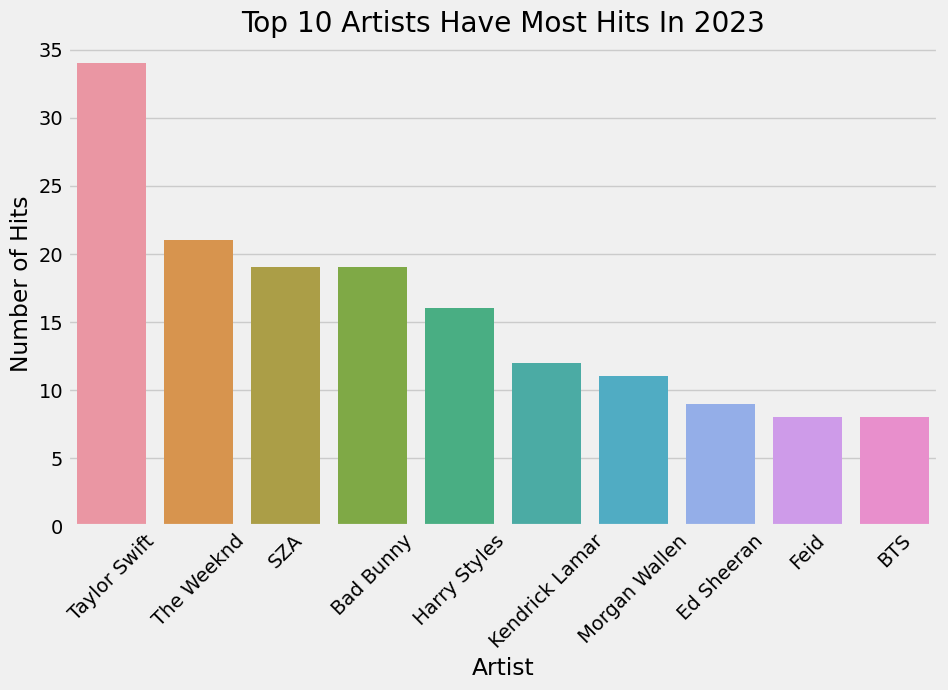

In [35]:
#the barplot represents Top 10 Artists Have Most Streamed Songs in 2023
plt.figure(figsize = (10, 6))

sns.barplot(x = top_artists.index, y = top_artists.values)

plt.title('Top 10 Artists Have Most Hits In 2023')
plt.xlabel('Artist')
plt.ylabel('Number of Hits')
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

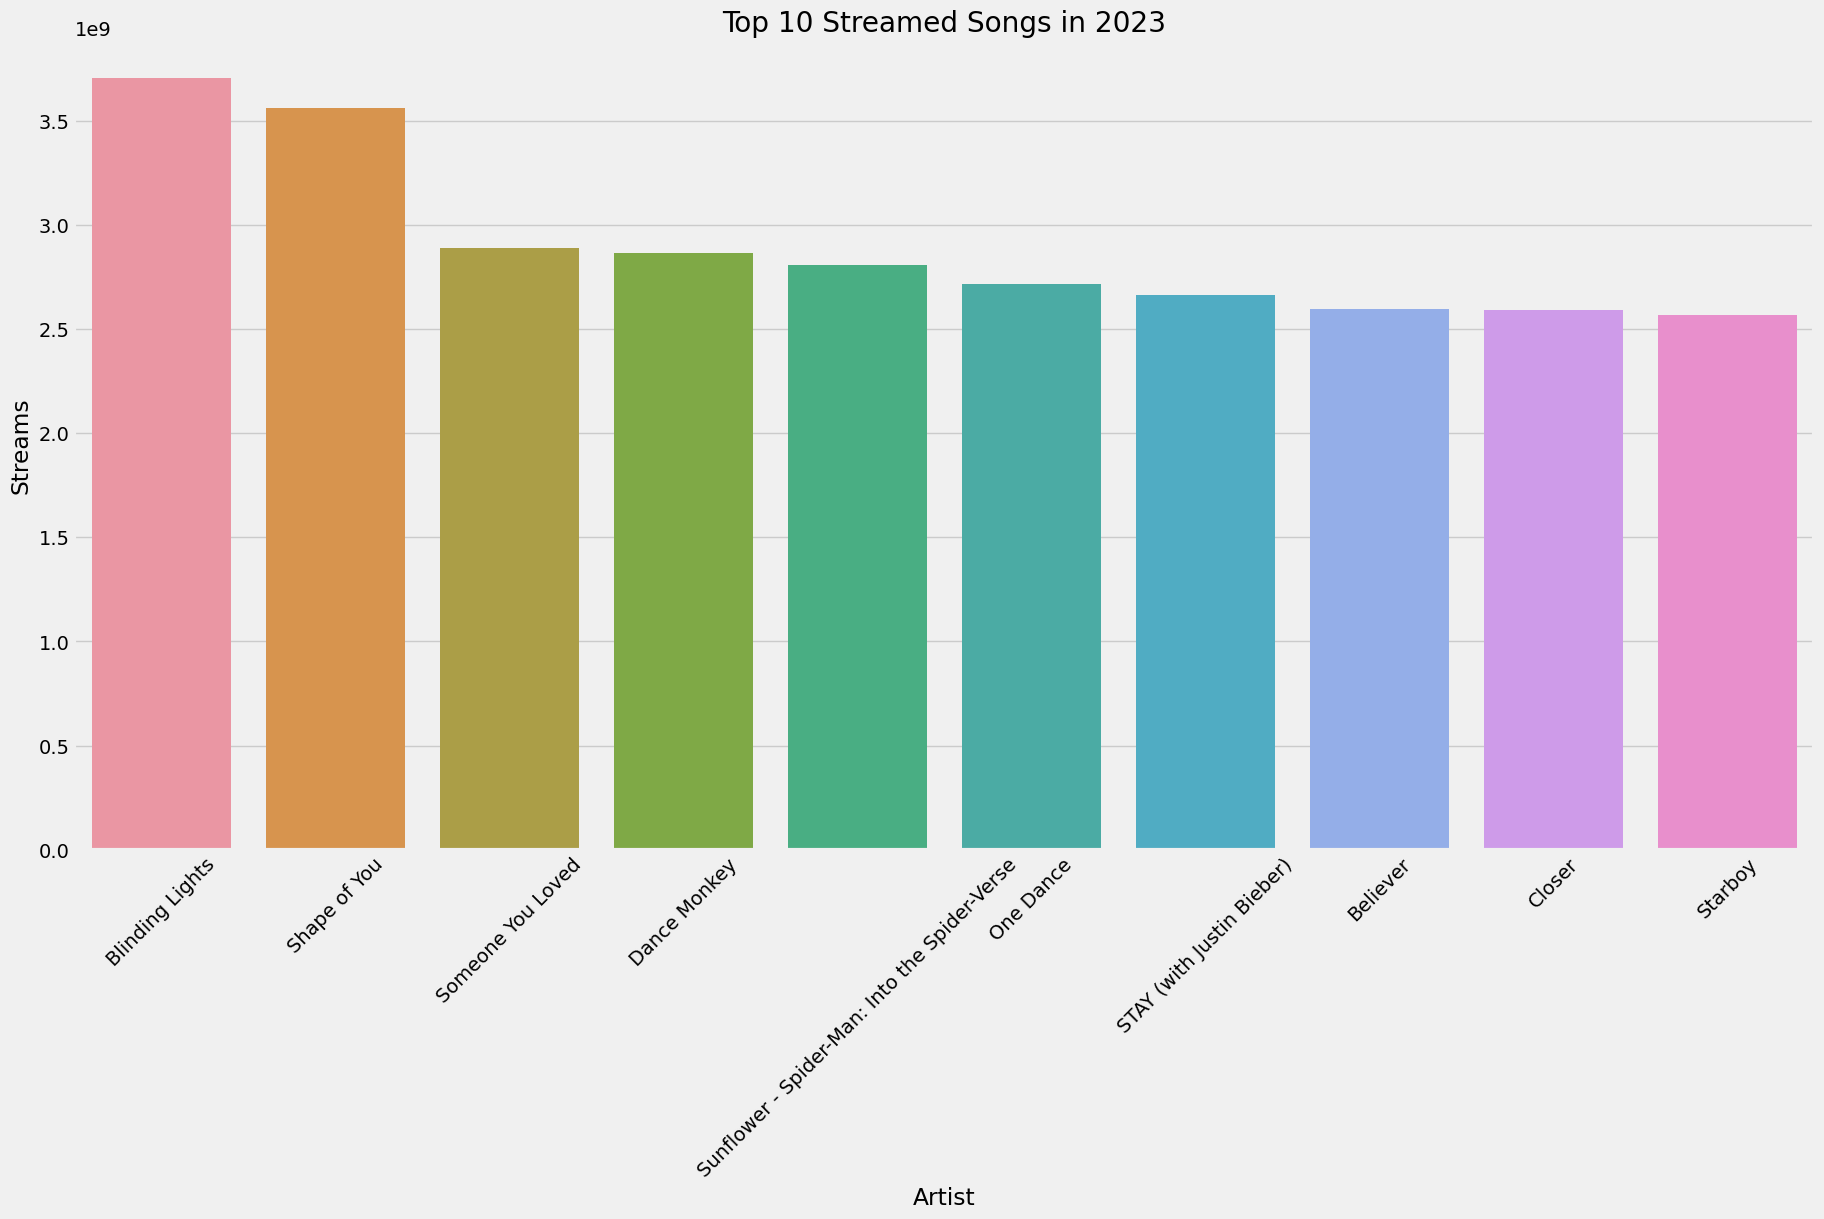

In [37]:
#the barplot represents Top 10 Streamed Songs in 2023
plt.figure(figsize = (20, 10))

sns.barplot(x = spotify_df.track_name[:10], y = spotify_df.streams)

plt.title('Top 10 Streamed Songs in 2023')
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
# plt.tight_layout()
plt.show()

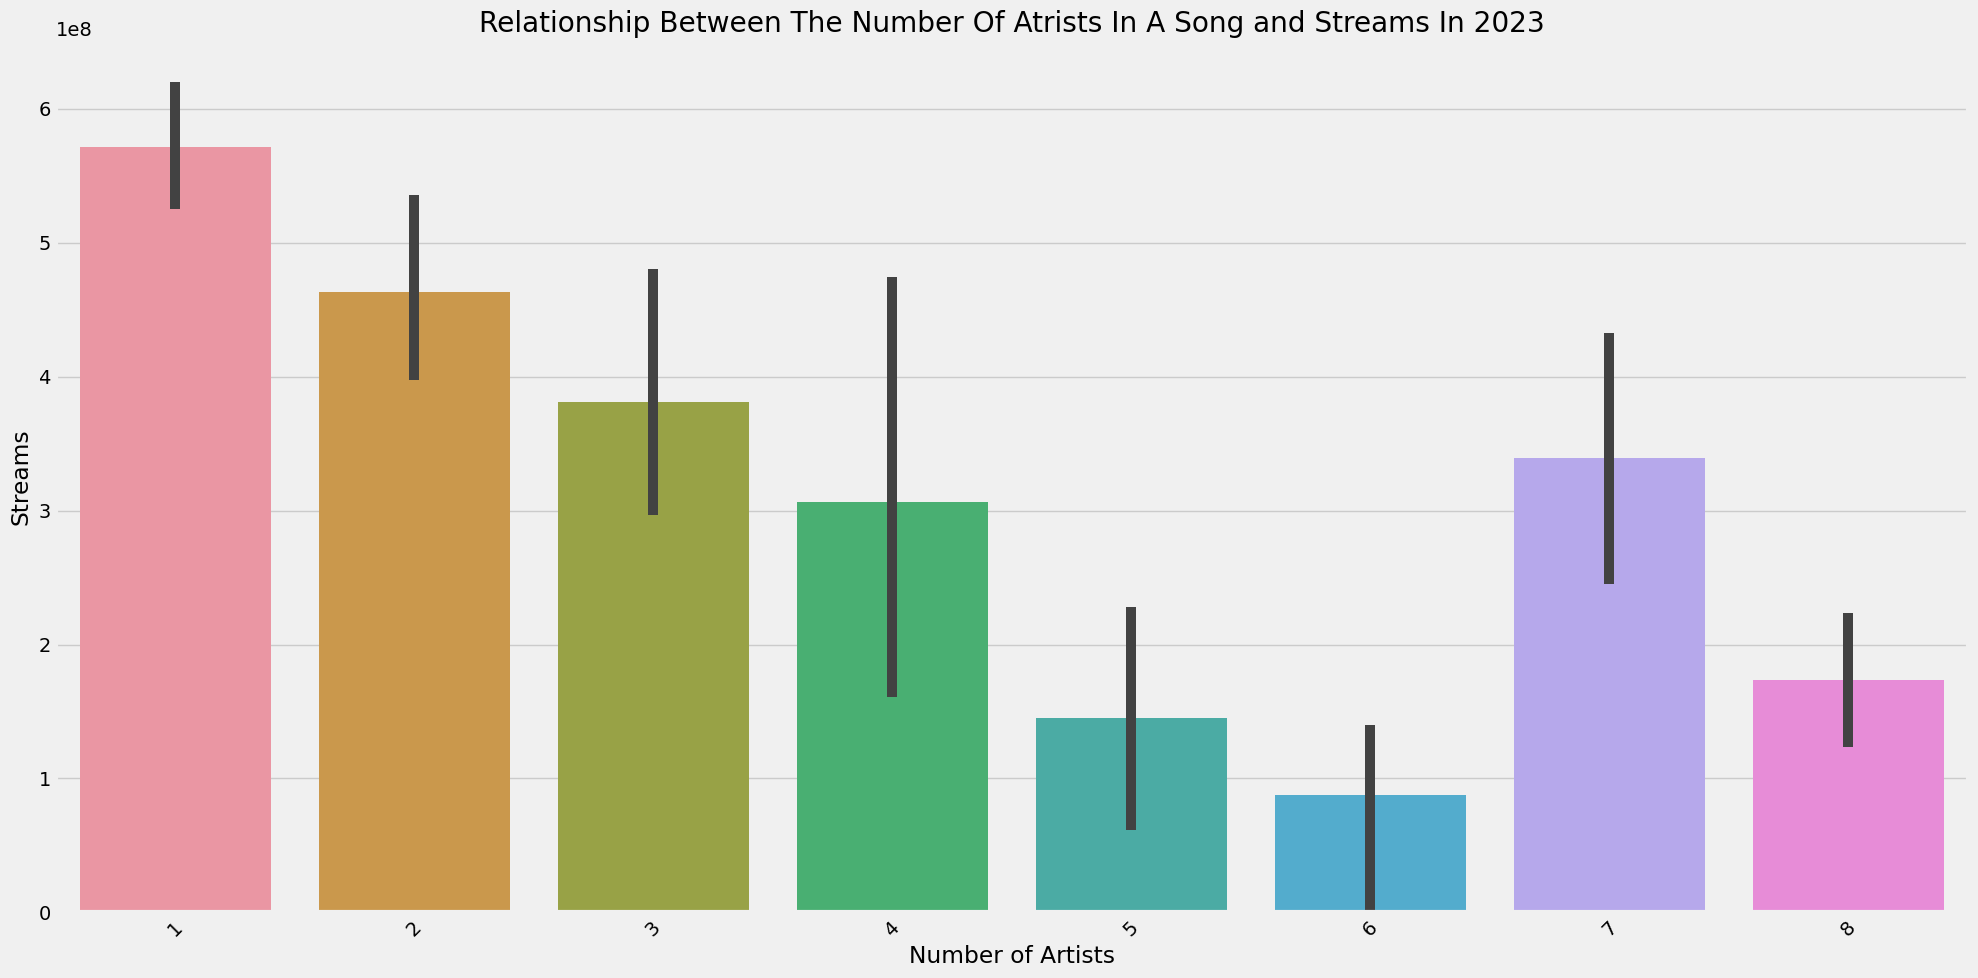

In [38]:
#the barplot represents Relationship Between The Number Of Atrists In A Song and Streams In 2023
plt.figure(figsize = (20, 10))

sns.barplot(x = spotify_df.artist_count, y = spotify_df.streams)

plt.title('Relationship Between The Number Of Atrists In A Song and Streams In 2023')
plt.xlabel('Number of Artists')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

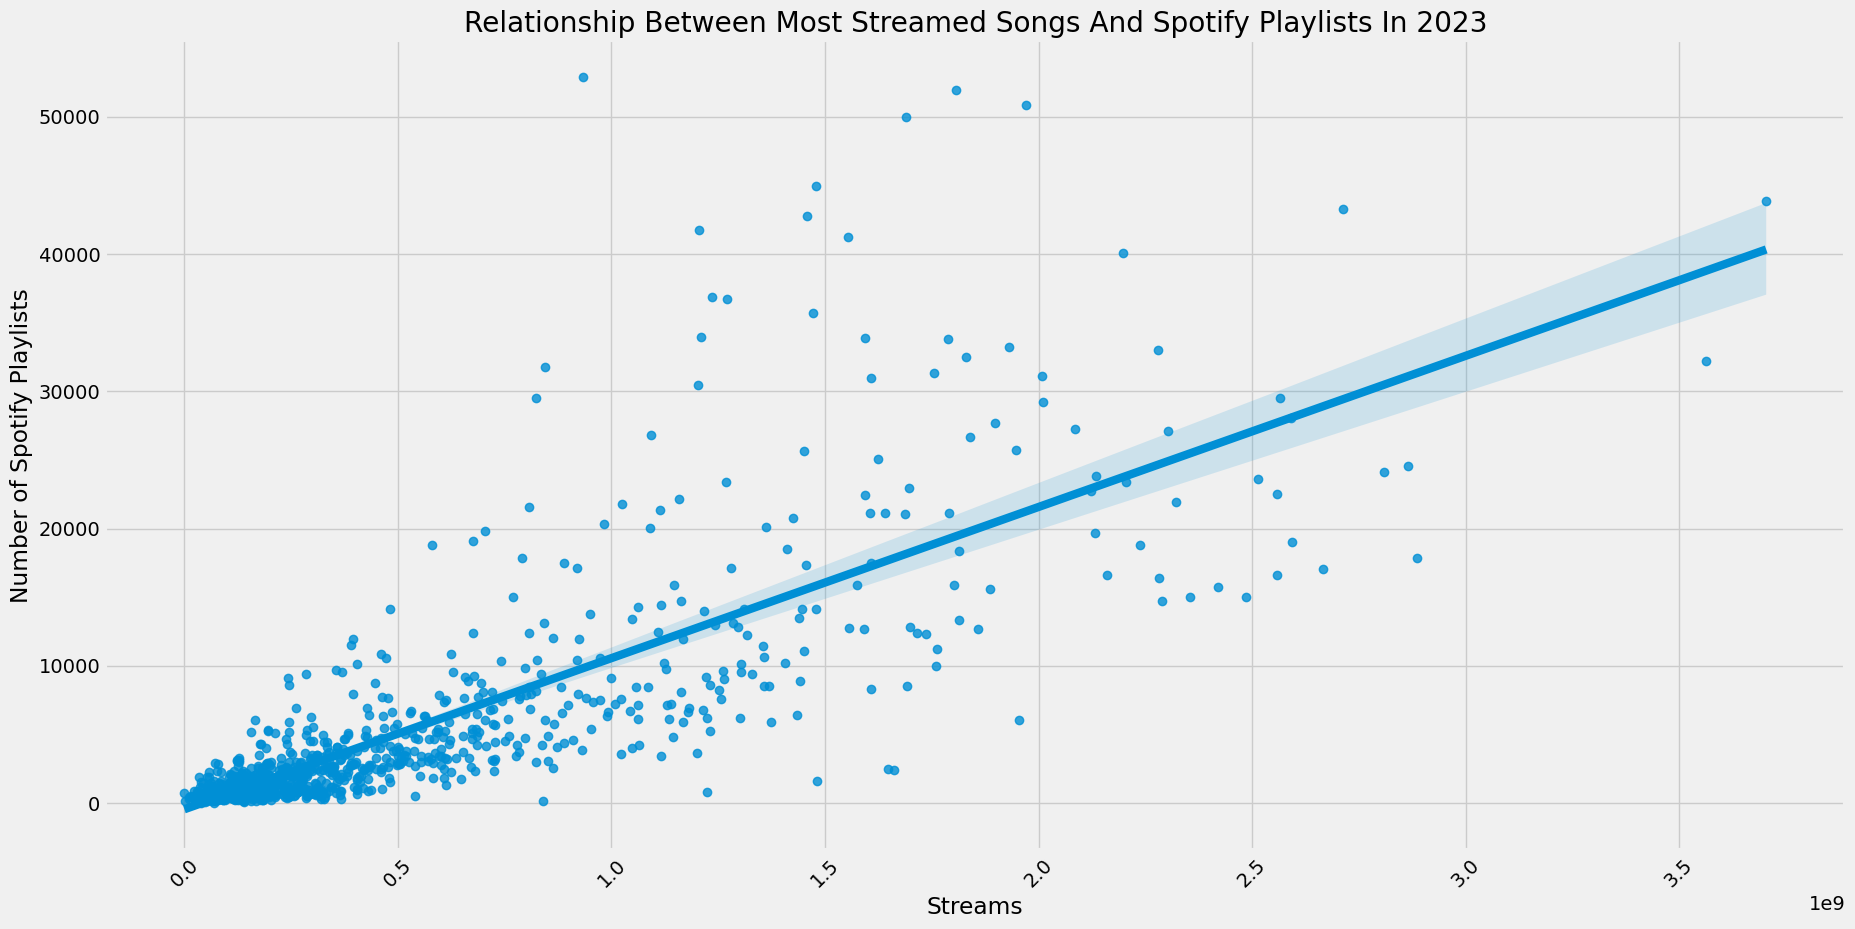

In [40]:
#the regplot (scatter plot with regression line) represents Relationship Between Most Streamed Songs And Spotify Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_spotify_playlists', data = spotify_df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Spotify Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Spotify Playlists')
plt.xticks(rotation = 45)
# plt.tight_layout()
plt.show()

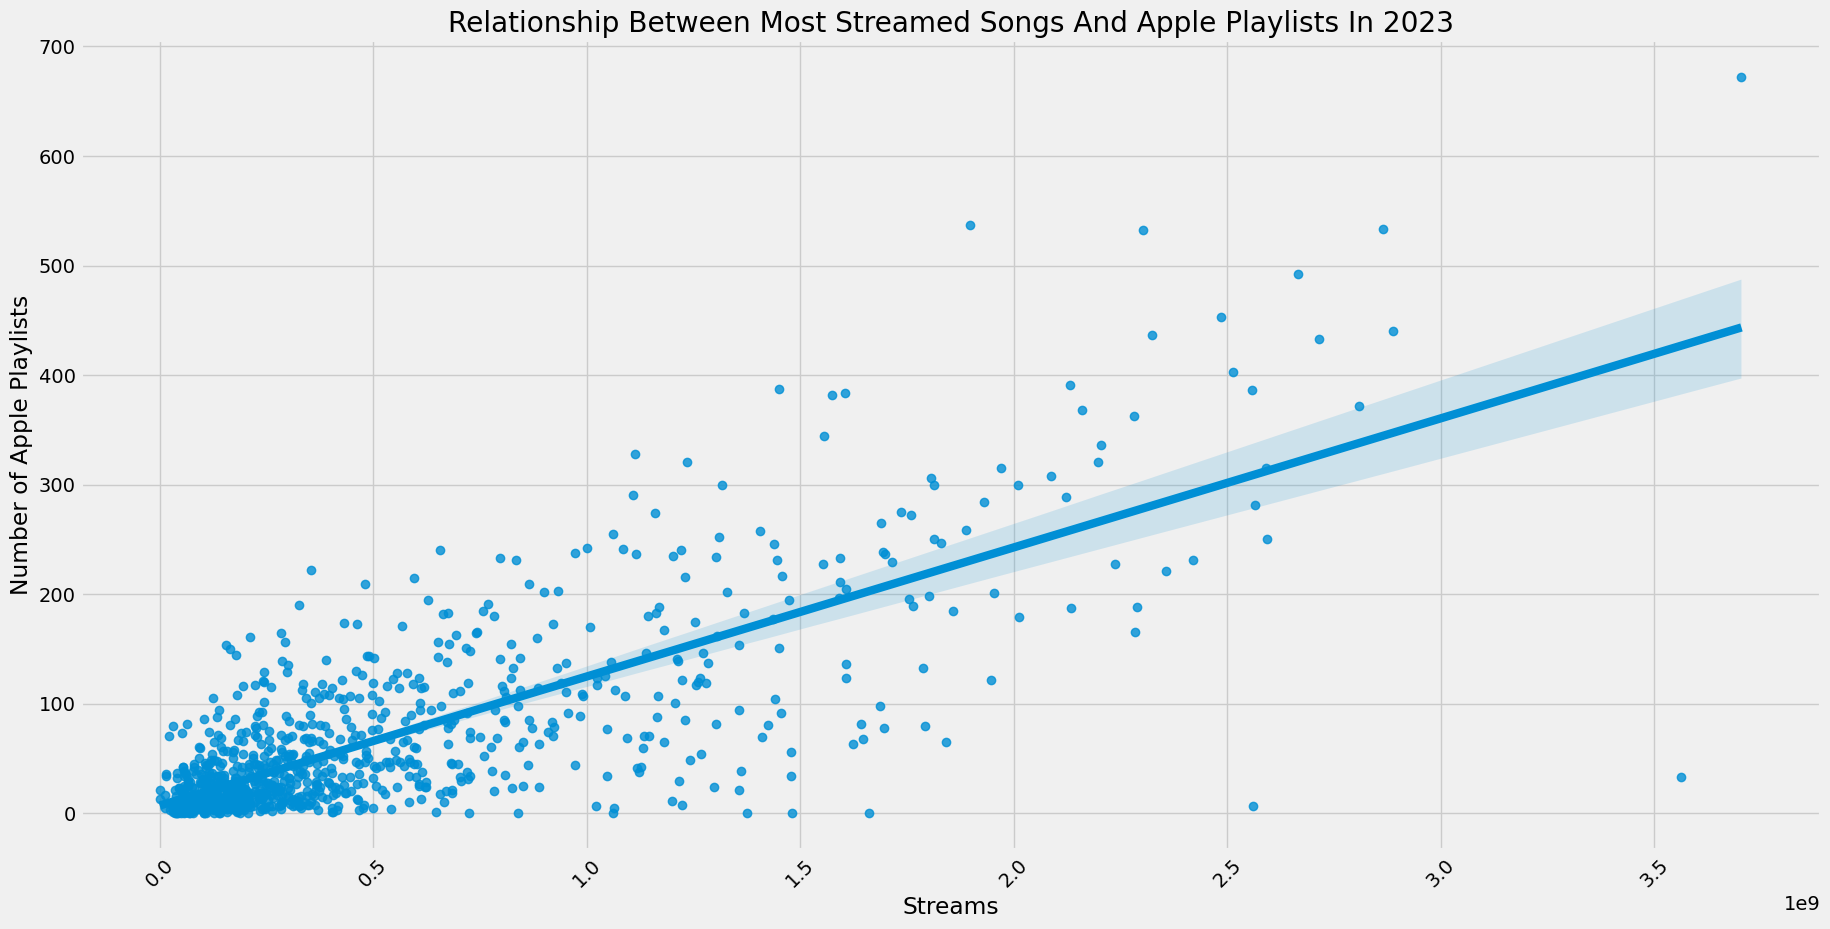

In [42]:
#the regplot (scatter plot with regression line) represents Relationship Between Most Streamed Songs And Apple Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_apple_playlists', data = spotify_df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Apple Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Apple Playlists')
plt.xticks(rotation = 45)
# plt.tight_layout()
plt.show()

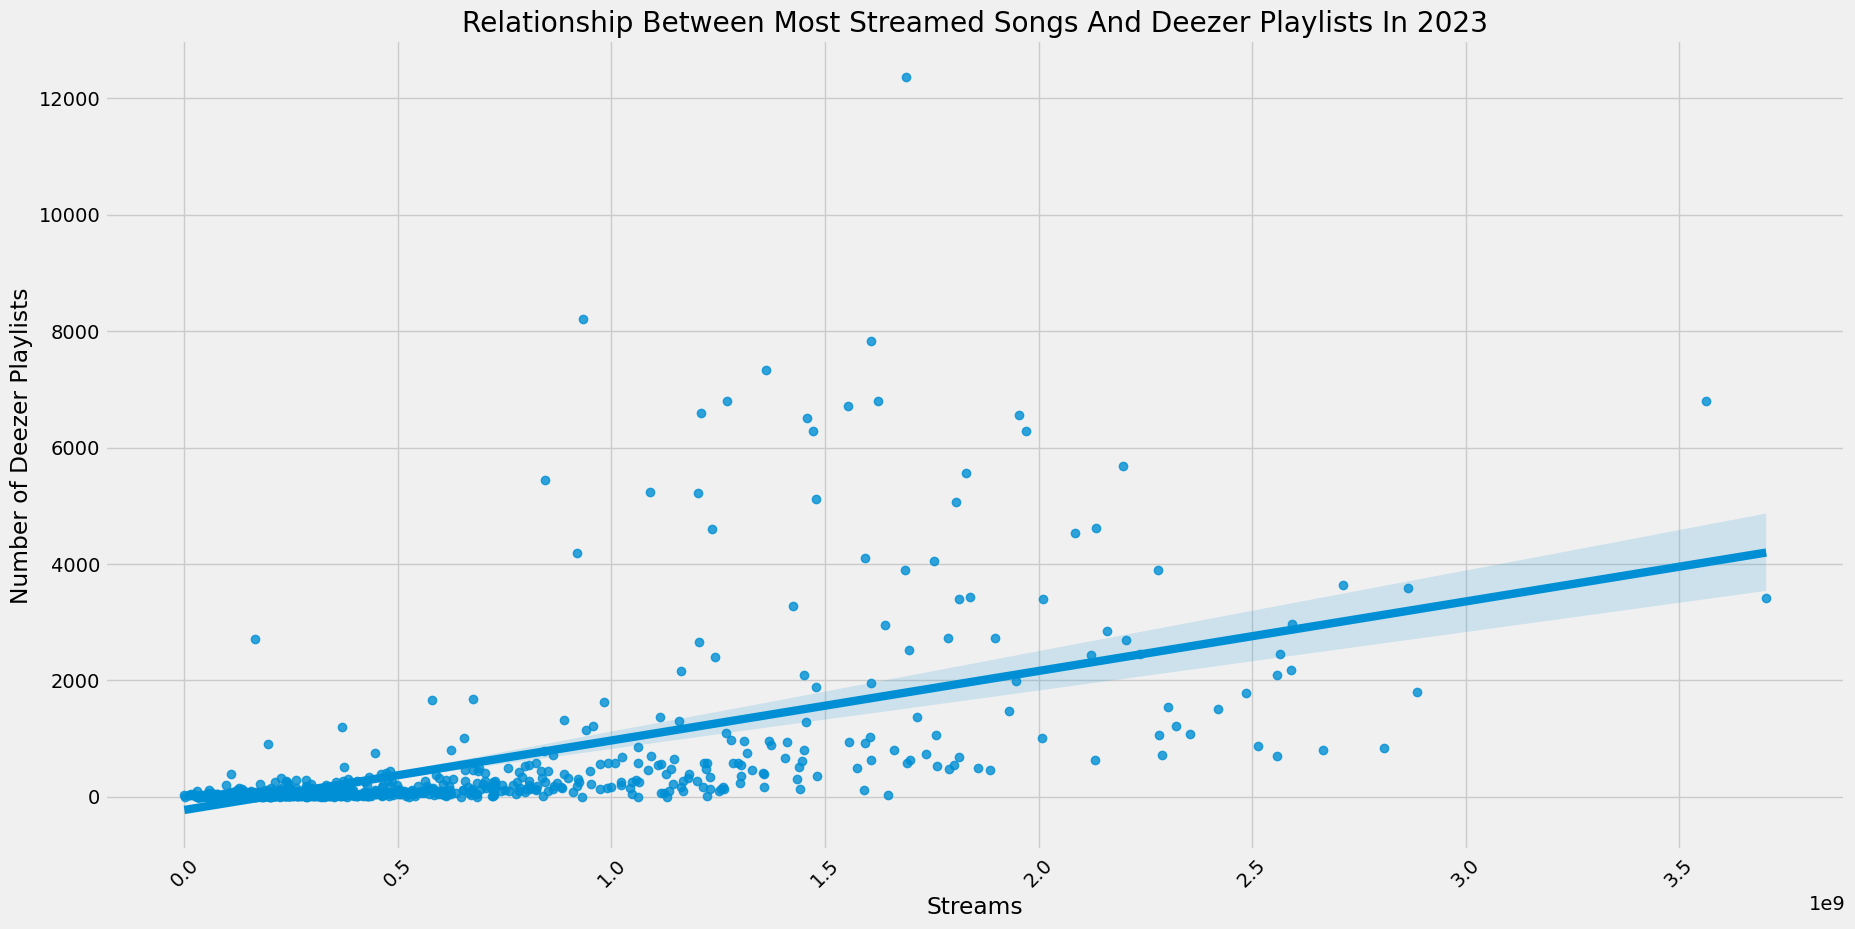

In [43]:
#the regplot (scatter plot with regression line) represents Relationship Between Most Streamed Songs And Spotify Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_deezer_playlists', data = spotify_df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Deezer Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Deezer Playlists')
plt.xticks(rotation = 45)
# plt.tight_layout()
plt.show()

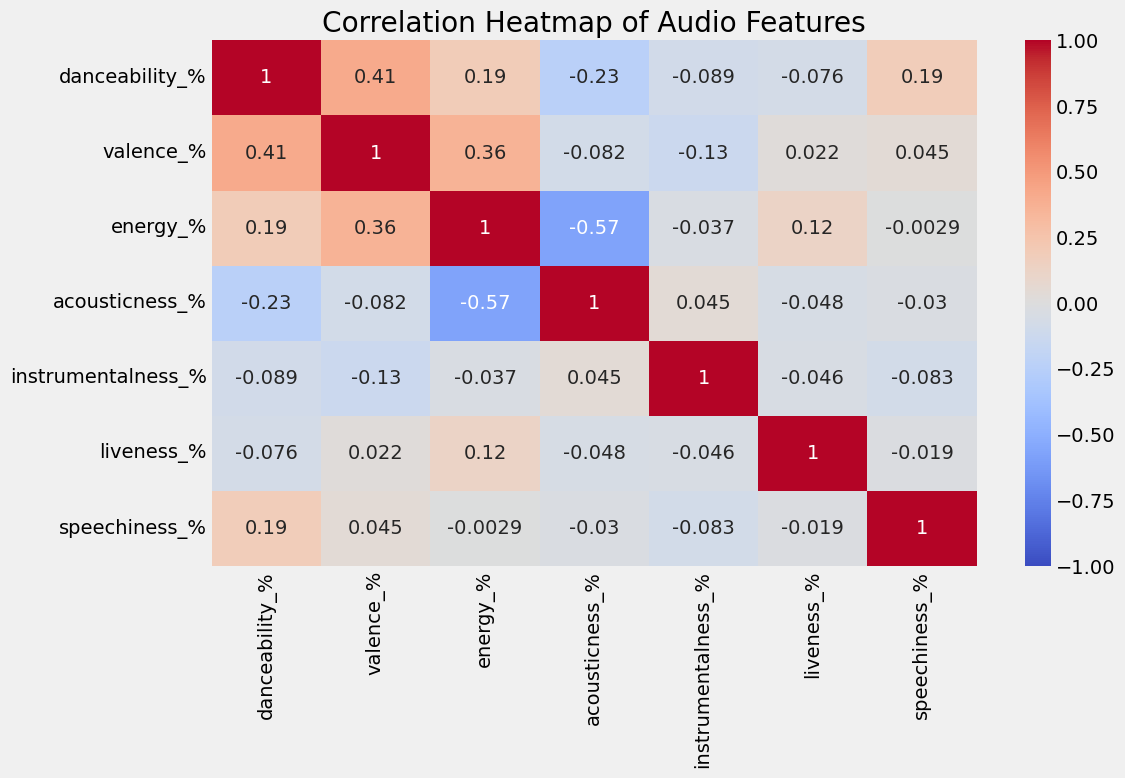

In [44]:
plt.figure(figsize = (12, 8))
corr = spotify_df[['danceability_%','valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%', 'speechiness_%']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin =- 1, vmax = 1)
plt.title('Correlation Heatmap of Audio Features')
plt.tight_layout()
plt.show()